<a href="https://colab.research.google.com/github/BhojRajBist/BhojRajBist/blob/main/img_to_potrait.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving IMG_0784.JPG to IMG_0784.JPG
Portrait saved as portrait.jpg


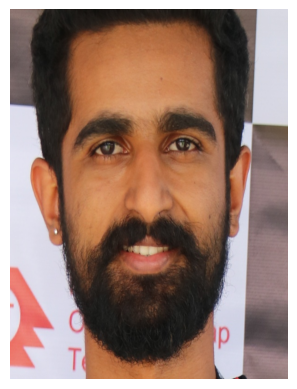

In [2]:
# Install required libraries
!pip install opencv-python dlib numpy

import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

# Function to create a portrait
def create_portrait(image_path, output_path="portrait.jpg"):
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Unable to load image.")
        return None

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Load face detector
    detector = dlib.get_frontal_face_detector()
    faces = detector(gray)

    if len(faces) == 0:
        print("No face detected!")
        return None

    # Extract the first detected face
    x, y, w, h = faces[0].left(), faces[0].top(), faces[0].width(), faces[0].height()

    # Expand the bounding box for a better portrait effect
    margin = int(0.3 * w)
    x, y = max(0, x - margin), max(0, y - margin)
    w, h = min(image.shape[1], w + 2 * margin), min(image.shape[0], h + 2 * margin)

    # Crop the face region
    portrait = image[y:y + h, x:x + w]

    # Resize to a standard portrait size (optional)
    portrait = cv2.resize(portrait, (600, 800))

    # Save the output
    cv2.imwrite(output_path, portrait)
    print(f"Portrait saved as {output_path}")

    return output_path

# Upload an image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # Get the uploaded file name

# Create and display portrait
portrait_path = create_portrait(image_path)
if portrait_path:
    img = Image.open(portrait_path)
    plt.imshow(img)
    plt.axis("off")
    plt.show()
